<a href="https://colab.research.google.com/github/p0shivhare/Airbnb-Booking-Analysis/blob/main/Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The potential business problem that could be addressed is how to utilize the data provided by Airbnb listings to improve the platform's overall performance and profitability. **

#### **Define Your Business Objective?**

The business objective is to analyze the data of the NYC Airbnb listings using basic exploratory data analysis techniques, with the aim of identifying the key metrics that influence property listings. Specifically, the analysis will examine the distribution of Airbnb listings in NYC based on factors such as location, price range, room type, and listing name. The ultimate goal is to extract meaningful insights from this analysis and provide actionable recommendations to improve the performance and profitability of the company.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset

df= pd.read_csv('/content/drive/MyDrive/Almabeller/Python/Capstone 1/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
num_rows, num_cols = df.shape

# row and column count
print('Number of rows: {}'.format(num_rows))
print('Number of columns: {}'.format(num_cols))

Number of rows: 48895
Number of columns: 16


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count
num_duplicates= df.duplicated().sum()

# Print the duplicate value
if num_duplicates==0:
  print('There is No Duplicate Value in DataFrame')
else:
  print('Number of Duplicte Values : {}'.format(num_duplicates))

There is No Duplicate Value in DataFrame


#### Missing Values/Null Values

In [23]:
# Missing Values/Null Values Count
null_count= df.isnull().sum()
print(null_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


/usr/local/lib/python3.8/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


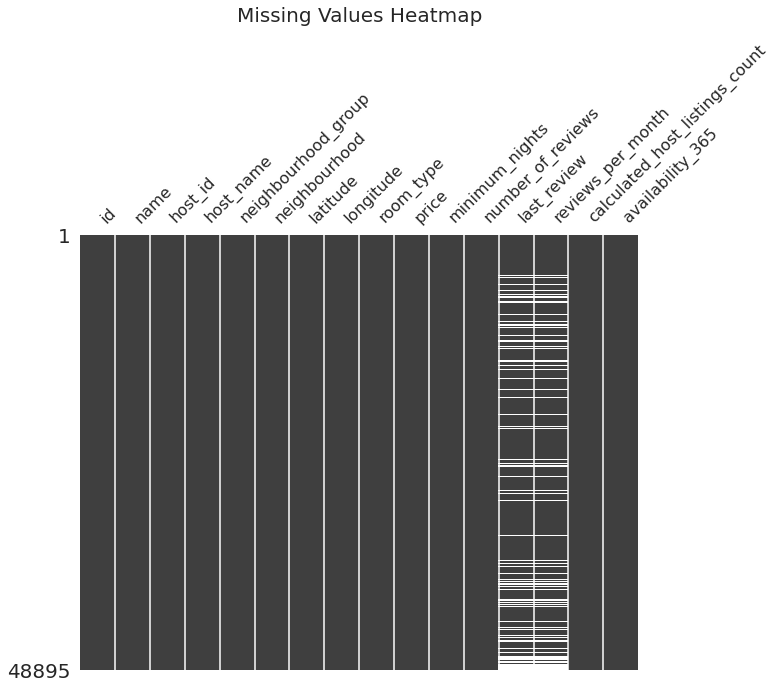

In [36]:
# Visualizing the missing values
# Set up figure size and font size
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)


# Plot missingno heatmap with custom settings
msno.matrix(df, ax=ax)
ax.set_title("Missing Values Heatmap", fontsize=20, pad=20)

plt.show()

### What did you know about your dataset?

The DataFrame is all out the distribution of every Airbnb listing based on their location in NYC, including their price range, room type listing name, and other related factors.
The DataFrame contains 48895 rows and 16 collumns.
The Description of the Dataset-

  -Field-------Description-------Dtype
* id---->Unique Id---->Int64
* name----->Name of the listing----->Object
* host_id	---->Unique host id	---->Int64
* host_name	---->Name of the host	---->Object
* neighborhood_group	---->Location	---->Object
* neighborhood	---->Area	---->Object
* latitude	---->Latitude range	---->Float64
* longitude	---->Longitude range	---->Float64
* room_type	---->Type of listing	---->Object
* price	---->Price of listing	---->Int64
* minimum_nights	---->Minumum nights to be paid for	---->Int64
* Number_of_reviews	---->Number of reviews	---->Int64
* last_review	---->Content of the last review	---->Object
* reviews_per_month	---->Number of checks per month	---->Float64
* Calculated_host_listing_count	---->Total count	---->Int64
* availability_365	---->Availability around the year	---->Int64

There is no Duplicate Value in DataFrame

There is some missing/null values in DataFrame-


In name column 16 null values, host_name 21 null values, last_review 10052 and also in reviews_per_month 10052 null values. Null values are visualized by missingno matrix all white line representing null value in DataFrame. 


## ***2. Understanding Your Variables***

In [38]:
# Dataset Columns
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [45]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The output displays several statistics for each of the numeric columns in the dataframe, including count, mean, standard deviation, minimum and maximum values, and standerd deviation. In this example, there are numeric columns such as 'price' and 'minimum_nights', along with eight others.

For the 'price' column, the mean price is 152.72 and the standard deviation is 240.15. In the 'minimum_nights' column, the mean is 7 and the standard deviation is 20.5.

It's important to note that the describe() method only works on numeric columns, so any categorical columns will be excluded from the output.

### Variables Description 

* **id**---->Unique Id---->Int64
* **name**----->Name of the listing----->Object
* **host_id** ---->Unique host id ---->Int64
* **host_name** ---->Name of the host ---->Object
* **neighborhood_group** ---->Location ---->Object
* **neighborhood** ---->Area ---->Object
* **latitude** ---->Latitude range ---->Float64
* **longitude** ---->Longitude range ---->Float64
* **room_type** ---->Type of listing ---->Object
* **price** ---->Price of listing ---->Int64
* **minimum_nights** ---->Minumum nights to be paid for ---->Int64
* **Number_of_reviews** ---->Number of reviews ---->Int64
* **last_review** ---->Content of the last review ---->Object
* **reviews_per_month** ---->Number of checks per month ---->Float64
* **Calculated_host_listing_count** ---->Total count ---->Int64
* **availability_365** ---->Availability around the year ---->Int64



### Check Unique Values for each variable.

In [47]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***

### Data Wrangling Code

We can see that some of the sells are null in name and host_name column in the DataFrame. We can replace them with 'Unknown'

In [48]:
# Write your code to make your dataset analysis ready.

# Filling missing values
df['name'].fillna('Unkonwn', inplace = True)
df['host_name'].fillna('Unknown', inplace =  True)

In [57]:
# avalibility_360 column
availbility_0= round((len(df[df['availability_365']==0])))
availbility_0

17533

We can see that the availability column has a minimum value of 0 for 17533 entries, which is quite surprising. This means that around 17533 entries of the data has an extreme case where the apartments have 0 availability days. 

This is not practical to detect which apartments have a genuine 0 availability, so **we will not change this column. Changing this column can lead to manipulating apartments that are usually busy.**

We can also clearly see that minimum price is 0 , which is surprising as price 0 doesnt make sense to do business

lets fill these datas with appropriate price values (by filling the price with median price for each room_type)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***